<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">1. Camera calibration</p>

In this part we will work with the image sequence of the ``left`` directory. This sequence contains a series of images of the calibration template. For the calibration it should be taken into account that the size of each template slot is 30 mm in the $X$ and $Y$ axis.

In [1]:
import cv2
import glob
import copy
import math
import numpy as np
import imageio
import matplotlib.pyplot as plt

from pprint import pprint as pp

In [17]:
def load_images(filenames):
    return [imageio.imread(filename) for filename in filenames]

In [18]:
filenames = list(sorted(glob.glob("./left/*.jpg")))
imgs = load_images(filenames)

C:\Users\lucia\AppData\Local\Temp\ipykernel_20392\3789968186.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


``cv2.findChessboardCorners`` --> tuple of two elements
 - 0 if it failed to successfully detect the template, 1 otherwise
 - coordinates of the corners of the calibration template

<hr>

Calibration stencil = (8, 6)

In [32]:
# We will execute findChessboardCorners for each image to find the corners
corners = [cv2.findChessboardCorners(i, (8,6)) for i in imgs]
imgs2 = copy.deepcopy(imgs)
tmp = [cv2.drawChessboardCorners(img, (8,6), cor[1], cor[0]) for img, cor in zip(imgs2, corners) if cor[0]]
plt.imshow(imgs2[1])

<hr>

 ``get_chessboard_points (chessboard_shape, dx, dy)`` --> array of `NumPy` 
 of size $ N × 3 $ with the coordinates $ (x, y, z) $ of the corners of the calibration template in the reference system of the scene. 
 - $ N $ is the number of corners in the template.
 - chessboard_shape --> (8, 6). 
 - dx (resp. `` dy``) = width (resp. high) of a square of the calibration template = $30mm$.

In [28]:
def get_chessboard_points(chessboard_shape, dx, dy):
    return [[(i%chessboard_shape[0])*dx, (i//chessboard_shape[0])*dy, 0] for i in range(np.prod(chessboard_shape))]
cb_points = get_chessboard_points((8, 6), 30, 30)


<hr>

**ASIGNMENT** Repeat the procedure to calibrate the right camera too. In the end, print the calculated extrinsics and intrinsics parameters for both cameras.

Once finished, **please print the root mean square reprojection error and justify in the report its meaning.**

In [33]:
valid_corners = [cor[1] for cor in corners if cor[0]]
real_points = get_chessboard_points((8, 6), 30, 30)

# Convert coordinates list in the reference system and corners list to numpy array
object_points = np.asarray([real_points for i in range(len(valid_corners))], dtype=np.float32)
image_points = np.asarray(valid_corners, dtype=np.float32)

# Calibrate
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, imgs[1].shape[0:2], None, None)
extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))
np.savez('calib_left', intrinsic=intrinsics, extrinsic=extrinsics)


<hr>

**Exercise 10.** Following the procedure of the first part of the
of the practice, calibrate the right camera using the sequence
sequence of images from the ``right`` directory.

In [36]:
# Lets take the images of the right camera
filenamesRight = list(sorted(glob.glob("./right/*.jpg")))
imgsRight = load_images(filenamesRight)

# Calculate and draw the corners
cornersRight = [cv2.findChessboardCorners(i, (8,6)) for i in imgsRight]
imgsRight2 = copy.deepcopy(imgsRight)
[cv2.drawChessboardCorners(img, (8,6), cor[1], cor[0]) for img, cor in zip(imgsRight2, cornersRight) if cor[0]]
plt.imshow(imgsRight2[0])

# Extract the valid corners
valid_corners_r = [cor[1] for cor in cornersRight if cor[0]]
real_points_r = get_chessboard_points((8, 6), 30, 30)
# We convert our list of points in the scene reference system into an array.
object_points_r = np.asarray([real_points_r for i in range(len(valid_corners_r))], dtype=np.float32)
image_points_r = np.asarray(valid_corners_r, dtype=np.float32)

# Calibrate
rms_r, intrinsics_r, dist_coeffs_r, rvecs_r, tvecs_r = cv2.calibrateCamera(object_points_r, image_points_r, imgsRight[1].shape[0:2], None, None, flags=cv2.CALIB_FIX_ASPECT_RATIO)
extrinsics_r = list(map(lambda rvec_r, tvec_r: np.hstack((cv2.Rodrigues(rvec_r)[0], tvec_r)), rvecs_r, tvecs_r))


C:\Users\lucia\AppData\Local\Temp\ipykernel_20392\3789968186.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


<hr>

**OPTIONAL EXERCISE.** What is the distance, in millimeters, between the two cameras?

Hint: Use the extrinsics of the first pair of images so that all points of the template are simultaneously visible.

to convert rvecs to a matrix "rotM" use the openCV function "cv2.Rodrigues(rvecs[0])[0]" , e.g.


The information to calculate the distance between cameras has been obtained using the link data:

https://stackoverflow.com/questions/14444433/calculate-camera-world-position-with-opencv-python


In [ ]:
# You should replace these 3 lines with the output in calibration step
DIM=XXX
K=np.array(YYY)
D=np.array(ZZZ)
img = cv2.imread(img_path)
h,w = img.shape[:2]    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)    
cv2.imshow("undistorted", undistorted_img)


In [13]:
import cv2
import matplotlib.pyplot as plt
#print(cv2.__version__[0])
#assert cv2.__version__[0] == '3'    
#'The fisheye module requires opencv version >= 3.0.0'
import numpy as np
import os
import glob
CHECKERBOARD = (6,7)
subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_FIX_SKEW
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
_img_shape = None
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./fisheye pattern/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    #plt.imshow(img)
    if _img_shape == None:
        _img_shape = img.shape[:2]
    else:
        assert _img_shape == img.shape[:2], "All images must share the same size."    
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
        #cv2.imshow("gray",gray)
        ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK +cv2.CALIB_CB_NORMALIZE_IMAGE)
    # If found, add object points, image points (after refining them)
        #print(ret)
        if ret == True:
            objpoints.append(objp)
            cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
            imgpoints.append(corners)
            #print(imgpoints)
            
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
print(objpoints)
rms, _, _, _, _ = \
cv2.fisheye.calibrate(objpoints,imgpoints, gray.shape[::-1], K, D, rvecs, tvecs, calibration_flags, (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))
print("Found " + str(N_OK) + " valid images for calibration")
print("DIM=" + str(_img_shape[::-1]))
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")

[array([[[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5., 4., 0.],
        [0., 5., 0.],
        [1., 5., 0.],
        [2., 5., 0.],
        [3., 5., 0.],
        [4., 5., 0.],
        [5., 5., 0.],
        [0., 6., 0.],
        [1., 6., 0.],
        [2., 6., 0.],
        [3., 6., 0.],
        [4., 6., 0.],
        [5., 6., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [1., 0., 0.],
        [2., 

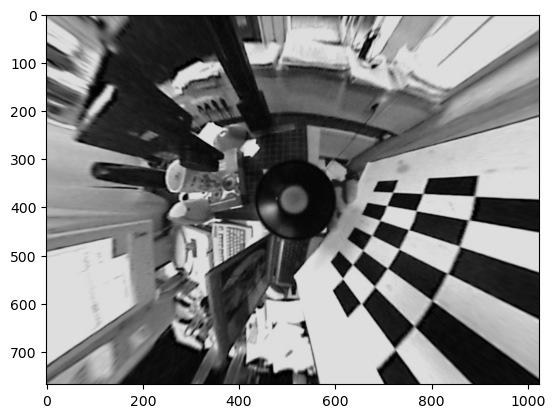

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
DIM=(1024, 768)
K=np.array([[187.8161737434532, 0.0, 508.44602683843647], [0.0, 184.06211263035433, 377.72400910626175], [0.0, 0.0, 1.0]])
D=np.array([[0.0645935500036711], [0.0630814997607552], [-0.03177360075341664], [-0.005769233304692502]])
img = cv2.imread('./fisheye pattern/VMRImage0.jpg')
h,w = img.shape[:2]    
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)    
#plt.imshow("undistorted", undistorted_img)
plt.imshow(undistorted_img)
